TASK[2]. Question 1

In [107]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt
import tsfel
import os

def load_data(file_path):
    return np.loadtxt(file_path)

2.1.a

In [108]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
combined_dir = os.path.join("HAR\Combined")
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset 
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

X_train=np.square(X_train[:, :, 0])+np.square(X_train[:, :, 1])+np.square(X_train[:, :, 2])

X_test=np.square(X_test[:, :, 0])+np.square(X_test[:, :, 1])+np.square(X_test[:, :, 2])



X_row_train=pd.DataFrame(X_train)
y_row_train=pd.DataFrame(y_train)
X_row_test=pd.DataFrame((X_test))
y_row_test=pd.DataFrame(y_test)


clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_row_train,y_row_train)

y_row_pred=clf.predict(X_row_test)

accuracy=accuracy_score(y_row_pred, y_row_test)
precision=precision_score(y_row_test, y_row_pred, average='weighted')
recall=recall_score(y_row_test, y_row_pred, average='weighted')
cm=confusion_matrix(y_row_test, y_row_pred)


print(f"Accuracy of raw acc. data: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"confusion Matrix:\n {cm}")
# print("--"*20)

Accuracy of raw acc. data: 0.6481481481481481
precision: 0.6476190476190475
recall: 0.6481481481481481
confusion Matrix:
 [[5 1 2 0 1 0]
 [1 5 1 1 0 1]
 [1 4 4 0 0 0]
 [0 0 0 6 0 3]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]


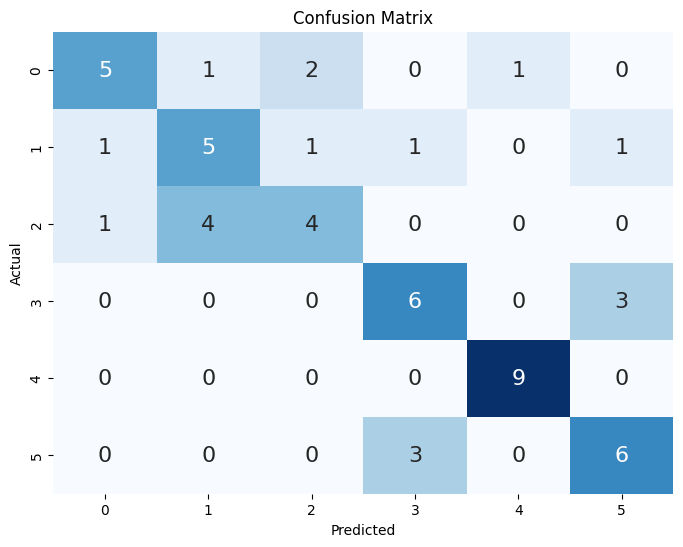

In [109]:
# ! pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


2.1.b

In [123]:
#Train a decision tree model using the features obtained by TSFEL
X_tsfel_train=pd.read_csv("HAR\\tsfel\\X_train_ts.csv")
y_tsfel_train=pd.read_csv("HAR\\tsfel\\y_train_ts.csv")
X_tsfel_test=pd.read_csv("HAR\\tsfel\\X_test_ts.csv")
y_tsfel_test=pd.read_csv("HAR\\tsfel\\y_test_ts.csv")
X=np.concatenate((X_tsfel_train,X_tsfel_test))
y=np.concatenate((y_tsfel_train,y_tsfel_test))
X_tsfel_train, X_tsfel_test, y_tsfel_train, y_tsfel_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_tsfel_train, y_tsfel_train)
y_tsfel_pred=clf.predict(X_tsfel_test)

accuracy = accuracy_score(y_tsfel_test, y_tsfel_pred)
precision = precision_score(y_tsfel_test, y_tsfel_pred, average='weighted')
recall = recall_score(y_tsfel_test, y_tsfel_pred, average='weighted')
cm = confusion_matrix(y_tsfel_test, y_tsfel_pred)

print(f"Accuracy of raw acc. data: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
# print(f"confusion Matrix: {cm}")
# print("--"*20)

Accuracy of raw acc. data: 0.7407407407407407
precision: 0.7493386243386243
recall: 0.7407407407407407


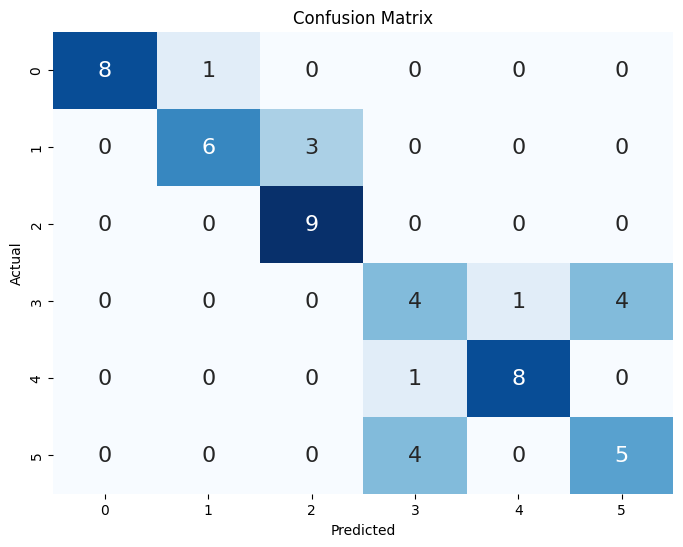

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

2.1.c

In [132]:
#Train a decision tree model using the features provided in the dataset
X_feature_train=np.loadtxt("HAR\\UCI HAR Dataset\\train\X_train.txt")
y_feature_train=np.loadtxt("HAR\\UCI HAR Dataset\\train\y_train.txt")
X_feature_test=np.loadtxt("HAR\\UCI HAR Dataset\\test\X_test.txt")
y_feature_test=np.loadtxt("HAR\\UCI HAR Dataset\\test\y_test.txt")

X=np.concatenate((X_feature_train,X_feature_test))
y=np.concatenate((y_feature_train,y_feature_test))
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_feature_train, y_feature_train)
y_feature_pred = clf.predict(X_feature_test)

accuracy = accuracy_score(y_feature_test, y_feature_pred)
precision = precision_score(y_feature_test, y_feature_pred, average='weighted')
recall = recall_score(y_feature_test, y_feature_pred, average='weighted')
cm = confusion_matrix(y_feature_test, y_feature_pred)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"confusion Matrix:\n {cm}")
# print("--"*20)

Accuracy: 0.9323624595469255
precision: 0.932420500989849
recall: 0.9323624595469255
confusion Matrix:
 [[482  20  15   0   0   0]
 [ 30 423  10   0   0   0]
 [  6  23 393   0   0   0]
 [  0   0   0 482  51   0]
 [  0   0   1  52 519   0]
 [  0   0   0   1   0 582]]


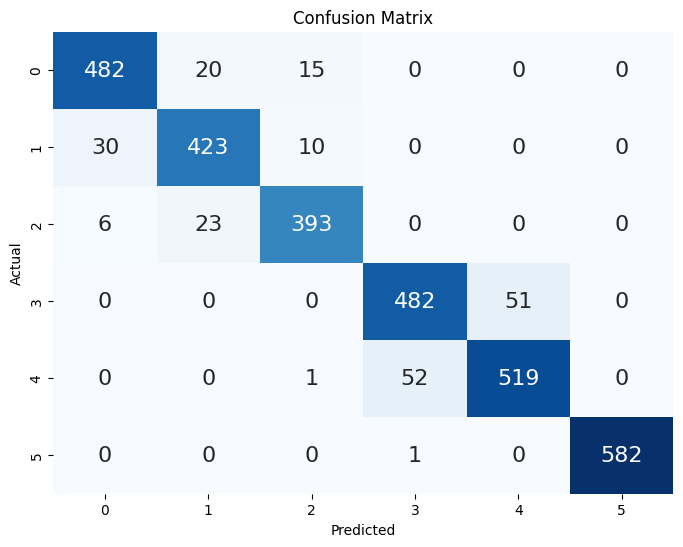

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Comparison: -

For train a decision tree model using the raw **accelerometer data**: - 
Accuracy: 0.6481481481481481
Precision: 0.6476190476190475
Recall: 0.6481481481481481

For train a decision tree model using the raw **TSFEL features**: - 
Accuracy: 0.7407407407407407
Precision: 0.7493386243386243
Recall: 0.7407407407407407

For train a decision tree model using the raw **The features provided in the dataset**: -
Accuracy: 0.9323624595469255
Precision: 0.932420500989849
Recall: 0.9323624595469255

"The data clearly shows that the model trained on the feature dataset performs significantly better than the models trained on raw accelerometer data or tsfel features."

Question 2.

2.2.a

C:\Users\mrtan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Depth:  2   Accuracy:  0.48148148148148145   pricision:  0.3355311355311355   recall:  0.48148148148148145
Depth:  3   Accuracy:  0.5370370370370371   pricision:  0.524465811965812   recall:  0.5370370370370371
Depth:  4   Accuracy:  0.5925925925925926   pricision:  0.614102564102564   recall:  0.5925925925925926
Depth:  5   Accuracy:  0.6296296296296297   pricision:  0.625   recall:  0.6296296296296297
Depth:  6   Accuracy:  0.6481481481481481   pricision:  0.6476190476190475   recall:  0.6481481481481481
Depth:  7   Accuracy:  0.6481481481481481   pricision:  0.6476190476190475   recall:  0.6481481481481481
Depth:  8   Accuracy:  0.6481481481481481   pricision:  0.6476190476190475   recall:  0.6481481481481481
Depth:  9   Accuracy:  0.6481481481481481   pricision:  0.6476190476190475   recall:  0.6481481481481481
Depth:  10   Accuracy:  0.6481481481481481   pricision:  0.6476190476190475   recall:  0.6481481481481481
Depth:  11   Accuracy:  0.6481481481481481   pricision:  0.64761904

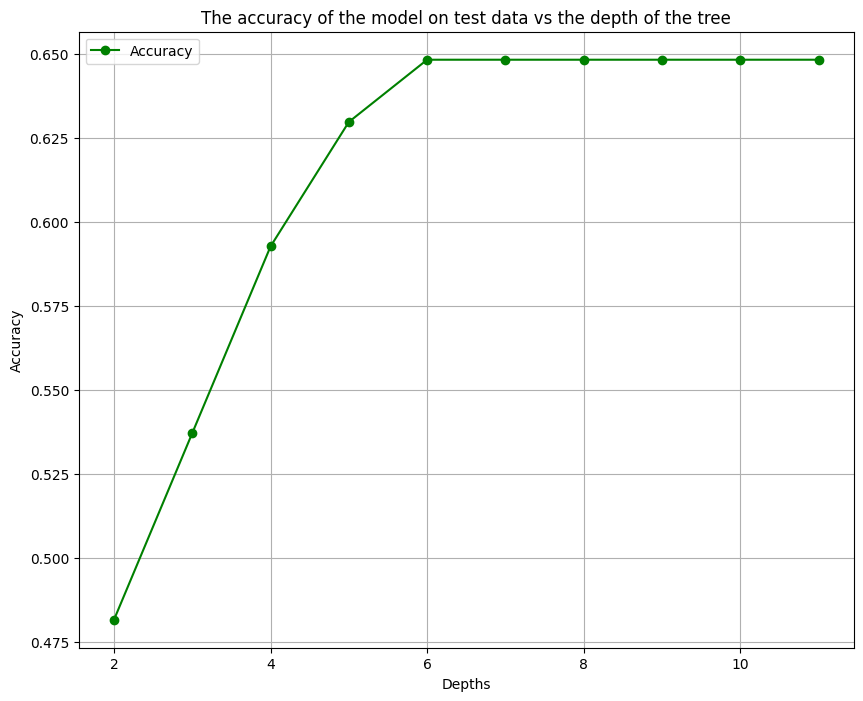

In [128]:
#Train a decision tree model using the raw accelerometer data with varying depths (2-8): -
depths=range(2,12)
accuracies=[]
precisions=[]
recalls=[]
# In above lists we store the accuracy, precisins and recall for different depths
for depth in range(2,12):
    clf=DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_row_train,y_row_train)
    y_row_pred=clf.predict(X_row_test)

    accuracy=accuracy_score(y_row_test, y_row_pred)
    precision=precision_score(y_row_test, y_row_pred, average='weighted')
    recall=recall_score(y_row_test, y_row_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    cm=confusion_matrix(y_row_test, y_row_pred)
    print("Depth: ",depth," ","Accuracy: ",accuracy," ","pricision: ",precision," ","recall: ",recall)

plt.figure(figsize=(10, 8))
plt.plot(depths,accuracies,label='Accuracy',color="green",marker="o")
plt.title('The accuracy of the model on test data vs the depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

2.2.b

Depth:  2   Accuracy:  0.6296296296296297   pricision:  0.45   recall:  0.6296296296296297
Depth:  3   Accuracy:  0.7777777777777778   pricision:  0.7925925925925925   recall:  0.7777777777777778
Depth:  4   Accuracy:  0.7407407407407407   pricision:  0.7485269360269361   recall:  0.7407407407407407
Depth:  5   Accuracy:  0.7592592592592593   pricision:  0.7562710437710437   recall:  0.7592592592592593
Depth:  6   Accuracy:  0.7407407407407407   pricision:  0.7493386243386243   recall:  0.7407407407407407
Depth:  7   Accuracy:  0.7407407407407407   pricision:  0.7493386243386243   recall:  0.7407407407407407
Depth:  8   Accuracy:  0.7407407407407407   pricision:  0.7493386243386243   recall:  0.7407407407407407


C:\Users\mrtan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mrtan\AppData\Local\Temp\ipykernel_24456\2664018871.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


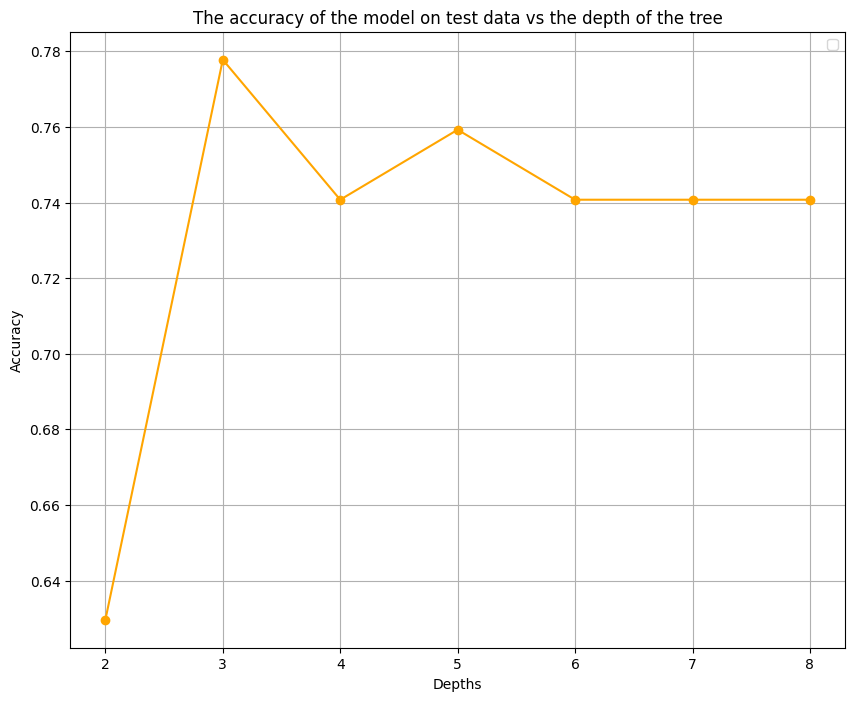

In [129]:
#Train a decision tree model using the features obtained by TSFEL with varing depths (2,8): -
depths=range(2,9)
accuracies=[]
precisions=[]
recalls=[]

for depth in range(2,9):
    clf=DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_tsfel_train, y_tsfel_train)
    y_tsfel_pred=clf.predict(X_tsfel_test)

    accuracy = accuracy_score(y_tsfel_test, y_tsfel_pred)
    precision = precision_score(y_tsfel_test, y_tsfel_pred, average='weighted')
    recall = recall_score(y_tsfel_test, y_tsfel_pred, average='weighted')
    cm = confusion_matrix(y_tsfel_test, y_tsfel_pred)
    accuracies.append(accuracy)

    print("Depth: ",depth," ","Accuracy: ",accuracy," ","pricision: ",precision," ","recall: ",recall)

plt.figure(figsize=(10, 8))
plt.plot(depths, accuracies,color="orange",marker="o")
plt.title('The accuracy of the model on test data vs the depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

2.2.c

C:\Users\mrtan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Depth:  2   Accuracy:  0.540453074433657   pricision:  0.3459834769772803   recall:  0.540453074433657


C:\Users\mrtan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Depth:  3   Accuracy:  0.7682847896440129   pricision:  0.6967965556426486   recall:  0.7682847896440129
Depth:  4   Accuracy:  0.8757281553398059   pricision:  0.878657027110846   recall:  0.8757281553398059
Depth:  5   Accuracy:  0.8779935275080906   pricision:  0.8863353054168699   recall:  0.8779935275080906
Depth:  6   Accuracy:  0.9119741100323625   pricision:  0.9132216342911683   recall:  0.9119741100323625
Depth:  7   Accuracy:  0.927831715210356   pricision:  0.9290161506858714   recall:  0.927831715210356
Depth:  8   Accuracy:  0.9323624595469255   pricision:  0.932636739423628   recall:  0.9323624595469255


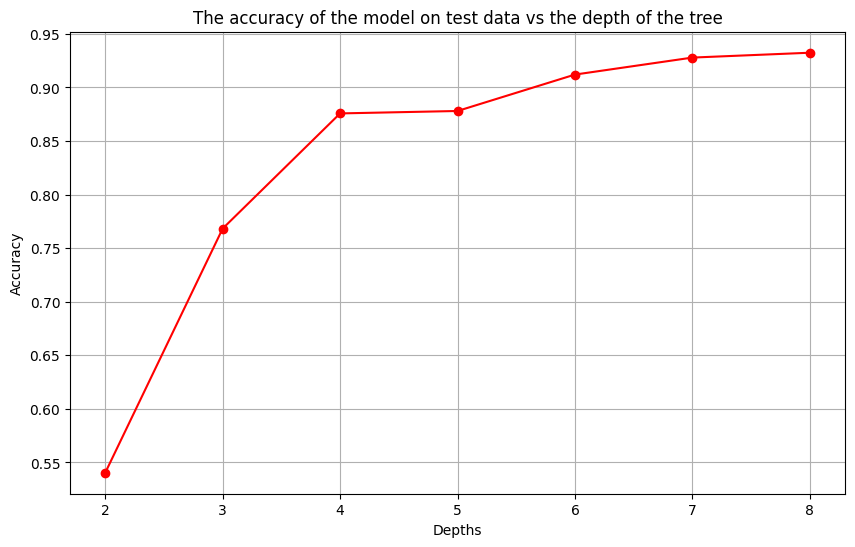

In [130]:
#Train a decision tree model using the features provided in the dataset with varying depths (2-8)
depths=range(2,9)
accuracies=[]
recall=[]
precision=[]

for depth in range(2, 9):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    clf.fit(X_feature_train, y_feature_train)
    y_feature_pred = clf.predict(X_feature_test)

    accuracy=accuracy_score(y_feature_test, y_feature_pred)
    precision=precision_score(y_feature_test, y_feature_pred, average='weighted')
    recall=recall_score(y_feature_test, y_feature_pred, average='weighted')
    accuracies.append(accuracy)
    cm=confusion_matrix(y_feature_test, y_feature_pred)
    print("Depth: ",depth," ","Accuracy: ",accuracy," ","pricision: ",precision," ","recall: ",recall)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, color='red',marker="o",label='Accuracy')
plt.title('The accuracy of the model on test data vs the depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Question 3.

The Raw accelerometer model misclassified activities in dynamic labels. It couldn't properly distinguish between walking, walking upstairs and walking downstairs in many cases
The TSFEL model classified the static activities correctly but misclassified once in dynamic activities in some cases.
On the other hand the Features model perfectly classified within static and dynamic. It only misclassified the labels within static and dynamic a little